# Short Program and Written Reflection 2
**Name:**       Krishna Priya Nimmagadda\
**Student ID:** 300595605


### Introduction

**Research Question:** What are the linguistic differences between posts tagged with 'Discussion' versus 'Question' flairs in the newest 100 posts of the VALORANT community?

**Hypothesis:** We hypothesize that posts with the "Question" flair will be shorter, more concise and use direct language, whereas "Discussion" posts will be longer, featuring more complex sentence structures while exhibiting a broader vocabulary.

Understanding these differences can provide insights into how gamers in the VALORANT community communicate when seeking help versus discussing broader topics.

### Corpus Description

The corpus consists of two categories of posts collected from the VALORANT subreddit:

**Discussion Posts:** These are tagged with the "Discussion" flair and generally involve users discussing broader topics, strategies, or community-related themes.

**Question Posts:** These are tagged with the "Question" flair and typically involve users seeking help or clarification on specific issues related to the game.


### Data Collection and Preprocessing

**Source:** 
The posts were collected using Reddit’s API through the PRAW (Python Reddit API Wrapper) library. The collection process retrieved the newest 100 posts under each flair. The posts are stored in separate folders:
- `discussion_posts` for "Discussion" flair posts
- `question_posts` for "Question" flair posts

**Category Definitions:** 
- **Discussion Posts:** Defined by the flair "Discussion," these posts are broader in scope, inviting users to exchange ideas, share opinions, or explore game-related topics.
- **Question Posts:** Defined by the flair "Question," these posts are direct queries where users seek specific answers or solutions.

**Determining Categories:** \
Posts were categorized based on their flair tags. The Reddit API allows filtering posts by flair, ensuring that only posts explicitly tagged as "Discussion" or "Question" were included. This automated approach eliminates ambiguity in classification

*Note: The assistance of ChatGPT has been used to generate the python code `corpus_getter.py`*

**Python code (`corpus_getter.py`):**

In [ ]:
import praw
import os

# Reddit API credentials
reddit = praw.Reddit(
    client_id='MY_CLIENT_ID',
    client_secret='MY_SECRET_KEY',
    user_agent='MY_USER_AGENT'
)

# Subreddit to scrape
subreddit = reddit.subreddit("VALORANT")

# Output folder to save the posts
# Change to "question_posts for question flair"
output_folder = "discussion_posts"     
os.makedirs(output_folder, exist_ok=True)

# Fetch posts with the 'Discussion' flair
# Adjust the limit as needed
# Change flair to Question for question posts
discussion_posts = subreddit.search("flair:Discussion", sort="new", limit=100)  

# Loop through posts and save each as a separate txt file
for idx, post in enumerate(discussion_posts, start=1):
    filename = f"{output_folder}/text{idx}.txt"
    with open(filename, "w", encoding="utf-8") as file:
        file.write(f"{post.title}\n\n")
        file.write(f"{post.selftext}\n")
    print(f"Saved: {filename}")

print("All discussion posts have been saved.")

Some potential issues that may rise with the data might be empty posts or posts with irrelevant content, such as images or videos. These would be filtered out for proper handling of the corpus during analysis.

### Basic Metric Analysis

The basic metrics are calculated for:
- **Total Texts:** The number of posts in each category.
- **Total Tokens:** The total word count across all posts.
- **Total Types:** The number of unique words.
- **Average Words per Text:** The average length of posts in terms of words.
- **Type-Token Ratio (TTR):** A measure of vocabulary diversity.

The text files obtained are stored on my GitHub repository and will be accessed via the following URLs using `!wget`:
- https://github.com/krishnapriya-n/valorant-reddit/blob/main/discussion_posts.zip
- https://github.com/krishnapriya-n/valorant-reddit/blob/main/question_posts.zip

#### Required Libraries

In [14]:
# Importing the required libraries
import requests
import os
import zipfile
import string
from collections import Counter

#### Download and Extract the Corpus

In [15]:
# URLs of the ZIP files
urls = {
    "discussion_posts": "https://github.com/krishnapriya-n/valorant-reddit/raw/main/discussion_posts.zip",
    "question_posts": "https://github.com/krishnapriya-n/valorant-reddit/raw/main/question_posts.zip"
}

# Download and extract each ZIP file
for category, url in urls.items():
    output_file = f"{category}.zip"
    folder_name = category

    # Download the file with error handling
    try:
        print(f"Downloading {category}...")
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        with open(output_file, 'wb') as file:
            file.write(response.content)
        print(f"Download successful: {output_file}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {category}: {e}")
        continue

    # Extract the ZIP file
    if not os.path.exists(folder_name):
        with zipfile.ZipFile(output_file, 'r') as zip_ref:
            zip_ref.extractall(folder_name)
        print(f"Extraction successful: {folder_name}")
    else:
        print(f"{folder_name} folder already exists.")

Download successful: discussion_posts.zip
discussion_posts folder already exists.
Download successful: question_posts.zip
question_posts folder already exists.


#### Preprocessing text by tokenizing, removing punctuation and converting to lowercase

In [16]:
# Function to process text by tokenizing and removing punctuation
def process_text(text):
    """Tokenizes the text, removing punctuation and converting to lowercase."""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).lower().split()

#### Preprocessing to remove stopwords (e.g. "the", "is", "to" etc.)

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = text.translate(str.maketrans('', '', string.punctuation)).lower().split()
    return [word for word in tokens if word not in stop_words]

#### Creating a function to analyze and calculate the basic metrics for both categories

In [18]:
# Function to analyze the corpus and calculate basic metrics
def analyze_corpus(folder):
    """Analyzes the corpus by calculating basic metrics."""
    total_texts = 0
    total_tokens = 0
    token_counter = Counter()

    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            total_texts += 1
            with open(os.path.join(folder, filename), "r", encoding="utf-8") as file:
                text = file.read()
                tokens = process_text(text)
                total_tokens += len(tokens)
                token_counter.update(tokens)

    total_types = len(token_counter)
    avg_words_per_text = total_tokens / total_texts if total_texts > 0 else 0
    ttr = total_types / total_tokens if total_tokens > 0 else 0

    return {
        "Total Texts": total_texts,
        "Total Tokens": total_tokens,
        "Total Types": total_types,
        "Average Words per Text": avg_words_per_text,
        "Type-Token Ratio": ttr
    }

#### Analysis of Discussion Posts

In [19]:
# Analyze Discussion Posts
discussion_folder = "discussion_posts"
print("\nDiscussion Posts Metrics:")
if os.path.exists(discussion_folder):
    discussion_metrics = analyze_corpus(discussion_folder)
    for k, v in discussion_metrics.items():
        print(f"{k}: {v}")
else:
    print("Discussion folder not found.")


Discussion Posts Metrics:
Total Texts: 100
Total Tokens: 6865
Total Types: 2364
Average Words per Text: 68.65
Type-Token Ratio: 0.34435542607428987


#### Analysis of Question Posts

In [20]:
# Analyze Question Posts
question_folder = "question_posts"
print("\nQuestion Posts Metrics:")
if os.path.exists(question_folder):
    question_metrics = analyze_corpus(question_folder)
    for k, v in question_metrics.items():
        print(f"{k}: {v}")
else:
    print("Question folder not found.")


Question Posts Metrics:
Total Texts: 100
Total Tokens: 3962
Total Types: 1490
Average Words per Text: 39.62
Type-Token Ratio: 0.37607269056032305


### Lexical Profile Analysis

#### Frequency Distributions
Using the `NLTK`'s `FreqDist`, the most common words in each category is determined.
The top 20 words in each category is compared to identify if there are any patterns.

In [21]:
import nltk
from nltk.probability import FreqDist

# Get word frequencies for Discussion Posts
discussion_words = []
for filename in os.listdir(discussion_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(discussion_folder, filename), "r", encoding="utf-8") as file:
            discussion_words.extend(process_text(file.read()))

discussion_freq = FreqDist(discussion_words)
print("\nTop 20 words in Discussion Posts:")
print(discussion_freq.most_common(20))

# Get word frequencies for Question Posts
question_words = []
for filename in os.listdir(question_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(question_folder, filename), "r", encoding="utf-8") as file:
            question_words.extend(process_text(file.read()))

question_freq = FreqDist(question_words)
print("\nTop 20 words in Question Posts:")
print(question_freq.most_common(20))


Top 20 words in Discussion Posts:
[('like', 75), ('game', 74), ('im', 56), ('time', 50), ('play', 49), ('valorant', 48), ('think', 46), ('get', 42), ('games', 40), ('2', 40), ('would', 39), ('dont', 38), ('know', 38), ('one', 37), ('good', 36), ('1', 30), ('3', 30), ('rank', 30), ('team', 29), ('make', 29)]

Top 20 words in Question Posts:
[('like', 55), ('play', 51), ('im', 51), ('game', 48), ('playing', 38), ('valorant', 36), ('good', 36), ('get', 33), ('dont', 31), ('aim', 26), ('one', 24), ('know', 24), ('people', 22), ('time', 21), ('really', 19), ('also', 19), ('2', 19), ('3', 17), ('games', 17), ('even', 16)]


#### Word Clouds
The most frequent words are visualized with a word cloud for each category.

In [22]:
!pip install wordcloud

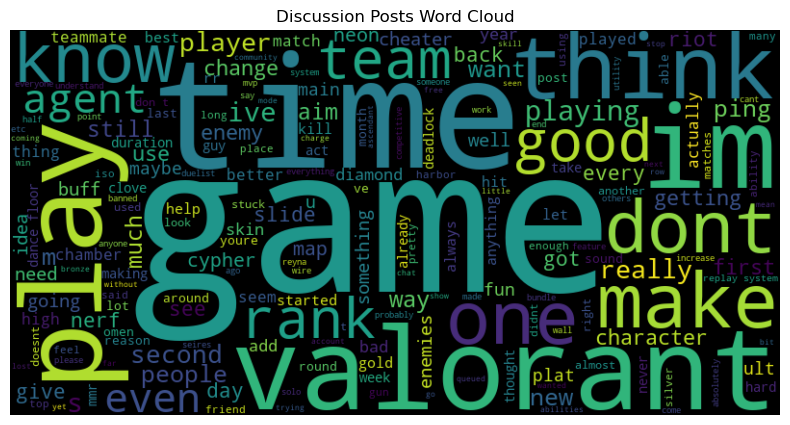

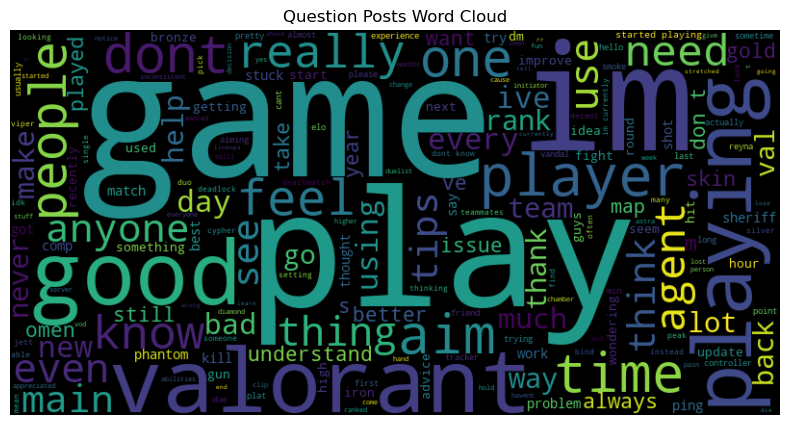

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate and display word cloud for Discussion Posts
discussion_wordcloud = WordCloud(width=800, height=400).generate(" ".join(discussion_words))
plt.figure(figsize=(10, 5))
plt.imshow(discussion_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Discussion Posts Word Cloud")
plt.show()

# Generate and display word cloud for Question Posts
question_wordcloud = WordCloud(width=800, height=400).generate(" ".join(question_words))
plt.figure(figsize=(10, 5))
plt.imshow(question_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Question Posts Word Cloud")
plt.show()

### Sentence Complexity Analysis

The sentence-level metrics for both categories to test the hypothesis about sentence complexity.

#### Average Sentence Length
Counting sentences and calculating the average number of words per sentence.

In [24]:
import re

def analyze_sentence_length(folder):
    total_sentences = 0
    total_words = 0

    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), "r", encoding="utf-8") as file:
                text = file.read()
                sentences = re.split(r'[.!?]', text)
                sentences = [s.strip() for s in sentences if s.strip()]
                total_sentences += len(sentences)
                total_words += sum(len(process_text(sentence)) for sentence in sentences)

    avg_sentence_length = total_words / total_sentences if total_sentences > 0 else 0
    return avg_sentence_length

# Calculate for Discussion Posts
discussion_avg_sentence_length = analyze_sentence_length(discussion_folder)
print(f"Average Sentence Length (Discussion Posts): {discussion_avg_sentence_length:.2f}")

# Calculate for Question Posts
question_avg_sentence_length = analyze_sentence_length(question_folder)
print(f"Average Sentence Length (Question Posts): {question_avg_sentence_length:.2f}")

Average Sentence Length (Discussion Posts): 8.78
Average Sentence Length (Question Posts): 8.03


### Visualization and Comparision

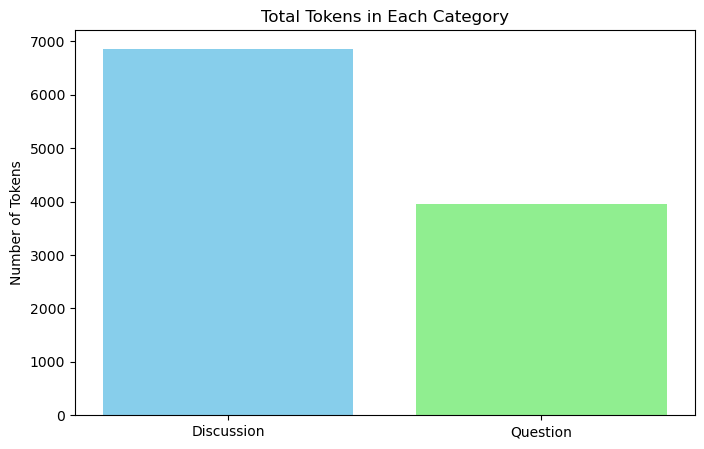

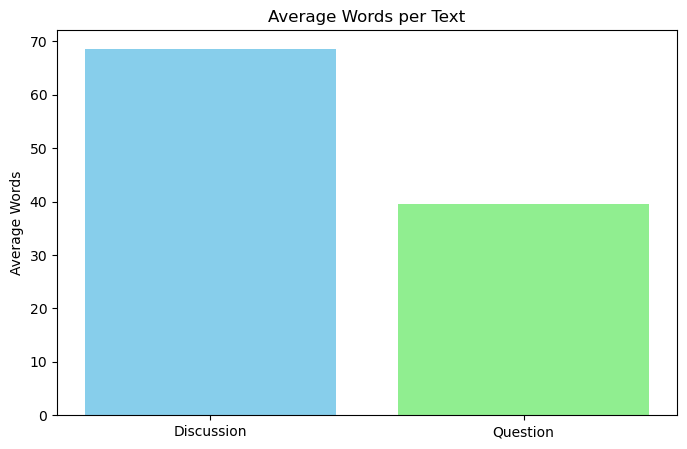

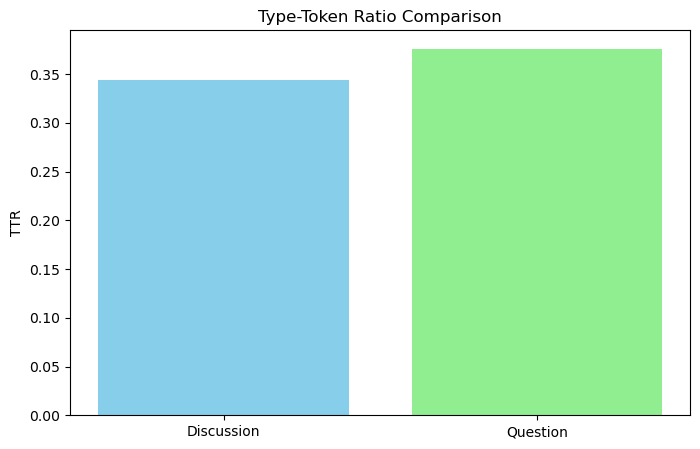

In [25]:
import matplotlib.pyplot as plt

categories = ["Discussion", "Question"]
total_tokens = [discussion_metrics["Total Tokens"], question_metrics["Total Tokens"]]
avg_words = [discussion_metrics["Average Words per Text"], question_metrics["Average Words per Text"]]
ttr = [discussion_metrics["Type-Token Ratio"], question_metrics["Type-Token Ratio"]]

# Plot Total Tokens
plt.figure(figsize=(8, 5))
plt.bar(categories, total_tokens, color=['skyblue', 'lightgreen'])
plt.title("Total Tokens in Each Category")
plt.ylabel("Number of Tokens")
plt.show()

# Plot Average Words per Text
plt.figure(figsize=(8, 5))
plt.bar(categories, avg_words, color=['skyblue', 'lightgreen'])
plt.title("Average Words per Text")
plt.ylabel("Average Words")
plt.show()

# Plot Type-Token Ratio
plt.figure(figsize=(8, 5))
plt.bar(categories, ttr, color=['skyblue', 'lightgreen'])
plt.title("Type-Token Ratio Comparison")
plt.ylabel("TTR")
plt.show()

### Reflection

The goal of this project was to analyze the linguistic differences between Reddit posts labeled with the "Discussion" and "Question" flairs within the VALORANT community. The approach combined data collection through the Reddit API (PRAW library), preprocessing, and basic metric analysis, leading to key insights into how these posts differ in structure and word usage.

##### Data Collection:
Using the Reddit API, 100 posts for each flair were collected and stored as separate text files. One notable challenge was ensuring that posts contained relevant textual content. Some posts were empty or contained only images/videos, which could impact the validity of the results. These were filtered out during preprocessing to maintain data integrity.

##### Preprocessing and Metrics:
Preprocessing included tokenizing the text, converting it to lowercase, and removing punctuation. Metrics such as total tokens, total types, average words per post, and type-token ratio (TTR) were calculated for both categories.

##### Findings:
- **Discussion Posts:**
    - Total Tokens: 6865
    - Total Types: 2364
    - Average Words per Text: 68.65
    - Type-Token Ratio: 0.344
- These metrics suggest that discussion posts tend to be longer and feature a broader vocabulary, supporting the hypothesis that these posts involve more elaborate communication and complex sentence structures.

- **Question Posts:**
    - Total Tokens: 3962
    - Total Types: 1490
    - Average Words per Text: 39.62
    - Type-Token Ratio: 0.376
- Question posts are shorter and more concise, confirming the expectation that users seeking help are more likely to use direct and efficient language.

##### Lexical Analysis and Patterns:
The frequency distributions of the top 20 words revealed that both categories share common high-frequency function words such as "like," "game," "im," "play," and "get," reflecting the conversational and casual nature of the texts. However, there are notable distinctions between the two categories in terms of the types of words that appear most frequently.

**Question Posts:** This category features a slightly higher frequency of personal pronouns like "I" and "my" (e.g., "im," "dont," "know"), which suggests that question posts are more focused on individual problems, concerns, or experiences. This indicates a more personal tone, where users are seeking advice, clarification, or help with specific issues. The presence of terms like "aim," "really," and "people" also highlights the query-based nature, where users are often inquiring about strategies or opinions.

**Discussion Posts:** The top words in this category include more variety, such as "game," "valorant," and "rank." Discussion posts appear to focus more on shared experiences and opinions, creating a broader, community-oriented conversation. Words like "think," "team," and "games" suggest a focus on group interaction, analysis, and reflection on game-related topics. There is also a noticeable use of numbers ("2," "3," "1"), possibly indicating game rankings, scores, or other game-related metrics, which are not as prominent in the question posts.

##### Visualization with Word Clouds:
Word clouds provided a visual summary of the most common words, reinforcing these patterns. The prominence of pronouns in question posts and diverse vocabulary in discussion posts was clearly illustrated.

### Conclusion

The findings align with the hypothesis: question posts are concise and focused on individual needs, while discussion posts are longer and explore broader themes. These insights can help community moderators and developers tailor communication tools or guidelines for different types of user interactions.

### Future Improvements
**Handling Non-Text Content:** Implementing a more sophisticated filtering mechanism for non-text posts.

**Sentiment Analysis:** Analyzing the sentiment behind the posts could add depth to understanding community interactions.

**Larger Sample Size:** Expanding the dataset could improve the robustness of the findings.